In [1]:
pip install opencv-python numpy matplotlib pillow

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 8.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 9.6 MB/s eta 0:00:00:00:010:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.4 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

In [3]:
# Define directories
input_dir = "../images"  # Directory where generated images are stored
output_dir = "../images"  # Save preprocessed images in the same folder
os.makedirs(output_dir, exist_ok=True)

# Target size for resizing
image_size = (224, 224)

# Get list of generated images
image_paths = glob(os.path.join(input_dir, "generated_*.png"))
print(f"Found {len(image_paths)} images for preprocessing.")

Found 3 images for preprocessing.


In [4]:
def preprocess_image(image_path):
    """
    Load an image, resize it to 224x224, normalize pixel values to [0,1],
    and return as a NumPy array.
    """
    image = cv2.imread(image_path)  # Read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, image_size)  # Resize to 224x224
    image = image.astype(np.float32) / 255.0  # Normalize to range [0,1]
    return image

In [5]:
preprocessed_images = []

for idx, image_path in enumerate(image_paths):
    processed_image = preprocess_image(image_path)
    preprocessed_images.append(processed_image)
    
    # Save processed image
    output_path = os.path.join(output_dir, f"preprocessed_{idx+1}.png")
    cv2.imwrite(output_path, (processed_image * 255).astype(np.uint8))
    print(f"Processed image saved: {output_path}")

Processed image saved: ../images/preprocessed_1.png
Processed image saved: ../images/preprocessed_2.png
Processed image saved: ../images/preprocessed_3.png


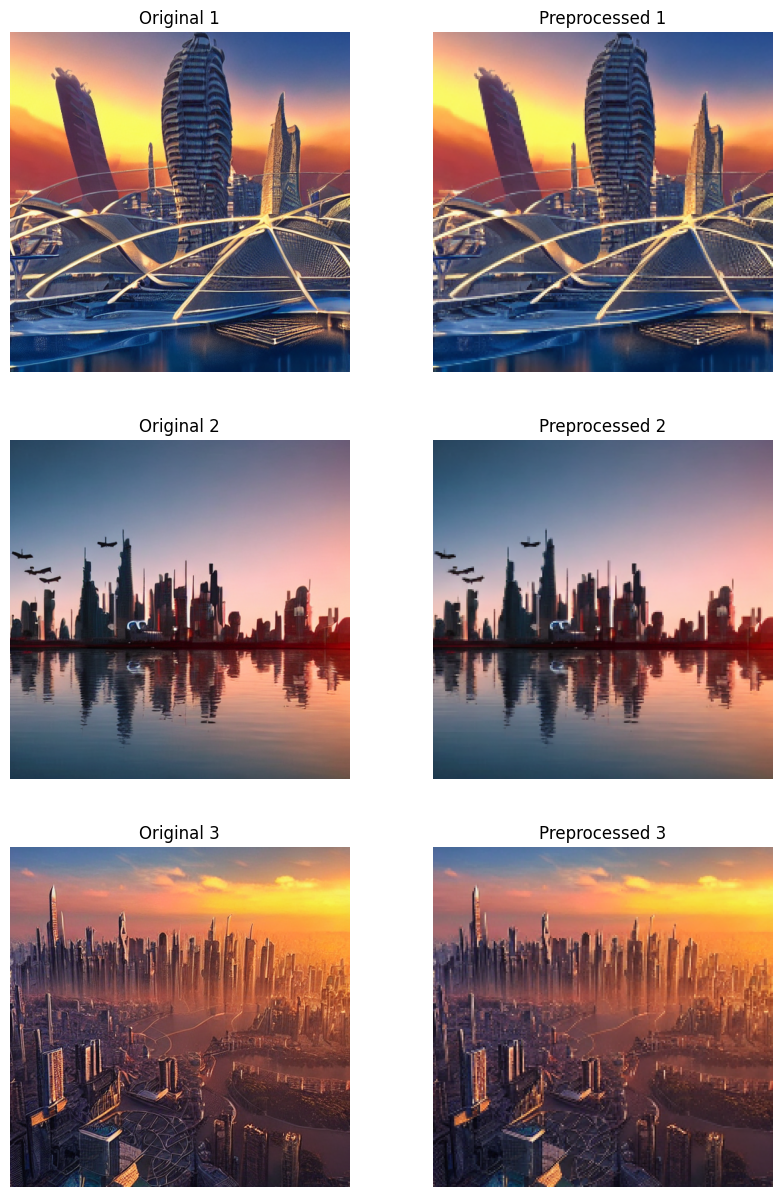

In [6]:
fig, axes = plt.subplots(len(image_paths), 2, figsize=(10, 5 * len(image_paths)))

for i, image_path in enumerate(image_paths):
    # Load original and preprocessed images
    original = Image.open(image_path)
    processed = preprocessed_images[i]

    # Display original
    axes[i, 0].imshow(original)
    axes[i, 0].axis("off")
    axes[i, 0].set_title(f"Original {i+1}")

    # Display preprocessed
    axes[i, 1].imshow(processed)
    axes[i, 1].axis("off")
    axes[i, 1].set_title(f"Preprocessed {i+1}")

plt.show()